## Libraries Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [2]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv',index_col=0)
df.head()

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
neo_id,,,,,,,,
2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
df.shape

(338199, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338199 entries, 2162117 to 54460573
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   name                    338199 non-null  object 
 1   absolute_magnitude      338171 non-null  float64
 2   estimated_diameter_min  338171 non-null  float64
 3   estimated_diameter_max  338171 non-null  float64
 4   orbiting_body           338199 non-null  object 
 5   relative_velocity       338199 non-null  float64
 6   miss_distance           338199 non-null  float64
 7   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), object(2)
memory usage: 21.0+ MB


## Data Cleaning

#### Handling Missing Values

In [5]:
df.isna().sum()

name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

`absolute_magnitude`, `estimated_diameter_min`, and `estimated_diameter_max` columns have 28 null values. 
We can impute these missing values using a central tendency value; however, we chose just to drop them scince their percentage of the total dataset is very small.

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 2162117 to 54460573
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   name                    338171 non-null  object 
 1   absolute_magnitude      338171 non-null  float64
 2   estimated_diameter_min  338171 non-null  float64
 3   estimated_diameter_max  338171 non-null  float64
 4   orbiting_body           338171 non-null  object 
 5   relative_velocity       338171 non-null  float64
 6   miss_distance           338171 non-null  float64
 7   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), object(2)
memory usage: 21.0+ MB


## -----------------------------------------------------------------

In [7]:
# checking dataset for duplicates
df.duplicated().sum()

0

- No Duplicates

In [8]:
#checking the values count of `orbiting_body`
df['orbiting_body'].value_counts()

orbiting_body
Earth    338171
Name: count, dtype: int64

- `orbiting_body` column contains only single unique value 'Earth', so we can drop this column without affecting the quality of the dataset.

In [9]:
df.drop(columns=['orbiting_body'],inplace = True)

# EDA

#### Checking Target Distribution

<Axes: xlabel='is_hazardous', ylabel='count'>

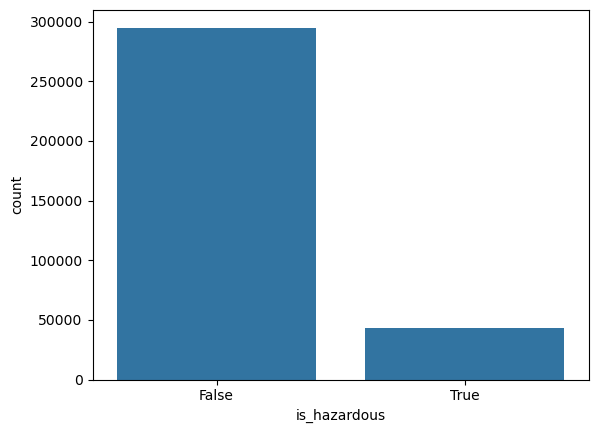

In [10]:
sns.countplot(data = df, x='is_hazardous')

The target `is_hazardous` column in imbalanced, which is an issue that should be addressed during the preprocessing stage.

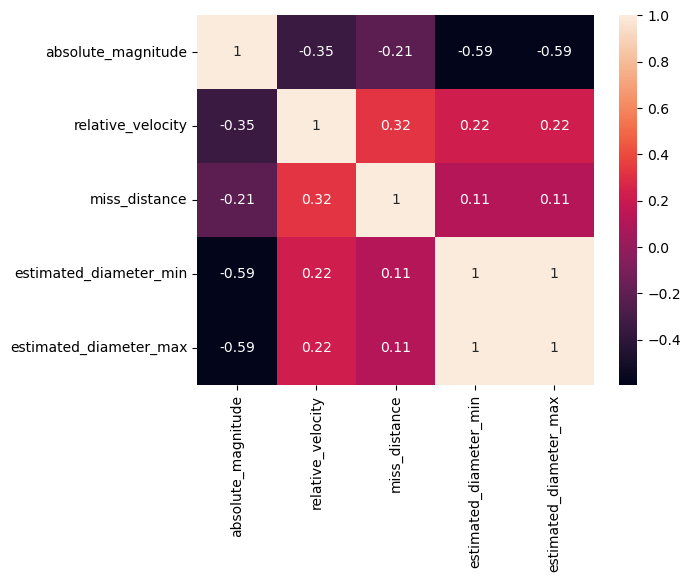

In [11]:
#corrolation among numeric columns befor handling the outliers
corr = df[['absolute_magnitude', 'relative_velocity', 'miss_distance',
       'estimated_diameter_min',
       'estimated_diameter_max']].corr()
sns.heatmap(corr,annot=True);

`estimated_diameter_min` , and `estimated_diameter_max` are completely corrolated, so we should consider dropping one of them.

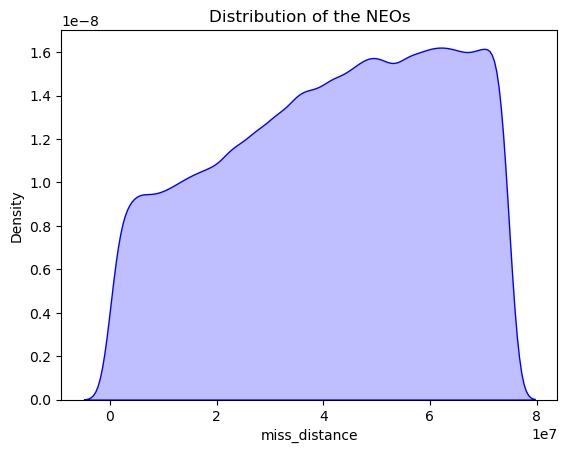

In [12]:
#check the distribution of miss_disstance
sns.kdeplot(df['miss_distance'], label='Original', color='blue', fill=True)
plt.title('Distribution of the NEOs');

In [13]:
#Farthest object from earth
df[df['miss_distance'] == df['miss_distance'].max()]

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
neo_id,,,,,,,
3702311,(2014 XD8),18.92,0.437074,0.977327,74389.977234,7.479865e+07,False


In [14]:
#closest object from earth
df[df['miss_distance'] == df['miss_distance'].min()]

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
neo_id,,,,,,,
54087809,(2020 VT4),28.61,0.005041,0.011273,48337.630377,6745.532516,False


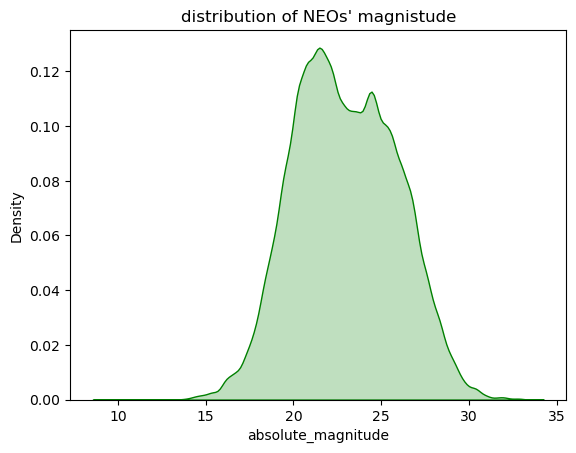

In [15]:
#check the distribution of absolute_magnistude
sns.kdeplot(df['absolute_magnitude'],label='Original', color='green', fill=True )
plt.title("distribution of NEOs' magnistude");

In [16]:
#Highest absolute_magnitude
df['absolute_magnitude'].max()

33.58

In [17]:
#lowest absolute_magnitude
df['absolute_magnitude'].min()

9.25

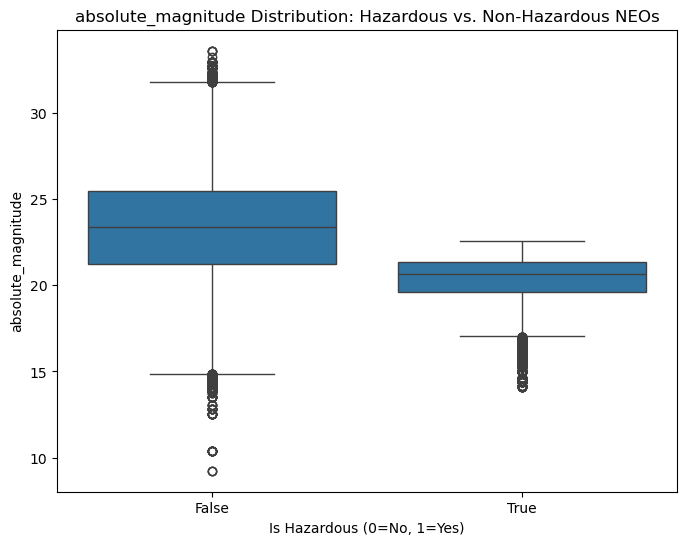

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="is_hazardous", y="absolute_magnitude", data=df)
plt.title("absolute_magnitude Distribution: Hazardous vs. Non-Hazardous NEOs")
plt.xlabel("Is Hazardous (0=No, 1=Yes)")
plt.ylabel("absolute_magnitude")
plt.show()

We can see that the absolute magnitude distribution of the non-hazardous NEOs has a higher median and wider range.
This could imply that there is a positive corrolation between the absolute magnitude and the potential of neo being non_hazardous (Most non-hazardous NEOs have higher absolute magnitude.
Or it could be a result of the class imbalnace.

In [22]:
#export cleaned datafram
df.to_csv('Cleaned_df.csv')